In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from IPython.display import Image

In [2]:
SIZE = 224
CLASSES_PATH = '../data/mobilenet/imagenet_classes.txt'
TEST_IMAGE_PATH = '../data/mobilenet/panda.jpg'

Download model from hub

In [3]:
hub_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_035_224/classification/4"
embed = hub.KerasLayer(hub_url)
model = tf.keras.Sequential([
    embed
])

Build model providing batch input shape

In [4]:
model.build([None, SIZE, SIZE, 3])  # Batch input shape.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  1692489   
Total params: 1,692,489
Trainable params: 0
Non-trainable params: 1,692,489
_________________________________________________________________


Read classes from file

In [5]:
classes = [line.rstrip('\n') for line in open(CLASSES_PATH)]

Read test image and vectorize it

In [6]:
img = tf.io.read_file(TEST_IMAGE_PATH)
img = tf.image.decode_jpeg(img)

img = tf.expand_dims(img, 0)
img = tf.cast(img, tf.float32) / 128.
img.set_shape((None, None, None, 3))
test_image = tf.image.resize(img, (SIZE, SIZE))

Get model predictions for image

In [7]:
predictions = model.predict(test_image)
class_index = np.argmax(predictions[0])

image_class = classes[class_index]

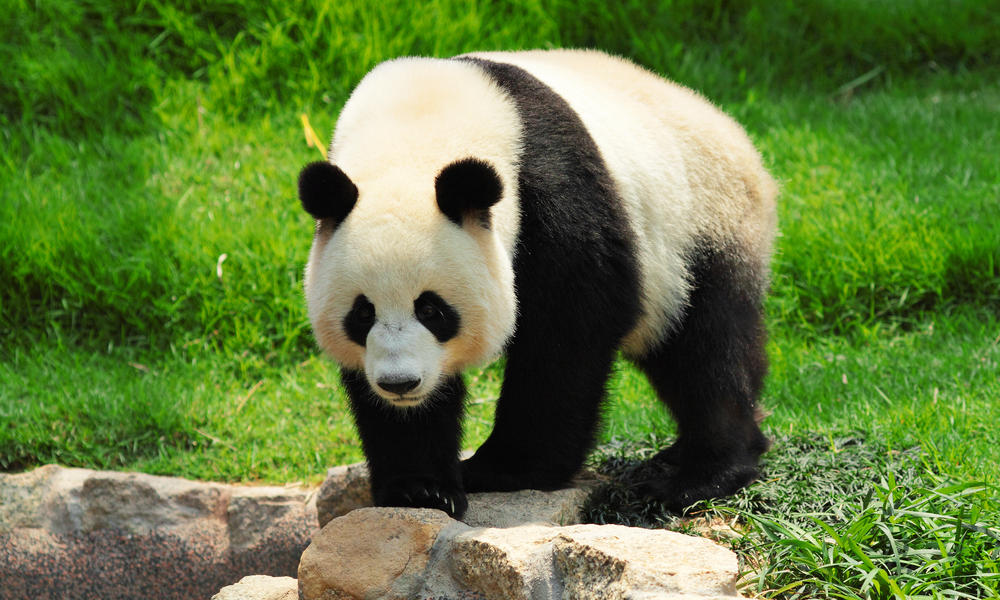

In [8]:
Image(filename=TEST_IMAGE_PATH) 

In [9]:
print('Predicted class: {}. Score: {} in range({} , {}) '.format(image_class, np.max(predictions[0]), 
                                                                 np.min(predictions[0]),np.max(predictions[0])))

Predicted class: giant panda. Score: 8.72952938079834 in range(-3.7143006324768066 , 8.72952938079834) 
